# Fashion MNIST Classification with Neural Networks

This project uses a neural network model to classify images from the Fashion MNIST dataset. The dataset contains 60,000 training images and 60,000 test images, each of size 28x28 pixels, labeled into 10 different categories.

## Project Structure

1. **Data Loading and Preprocessing**
2. **Model Definition**
3. **Model Compilation and Training**
4. **Evaluation**

## Requirements

The following Python libraries are required to run the code:

- `numpy`
- `pandas`
- `matplotlib`
- `plotly`
- `scikit-learn`
- `tensorflow`

You can install these libraries using pip:

```bash
pip install numpy pandas matplotlib plotly scikit-learn tensorflow


### **1. Data Loading and Preprocessing**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  # For handling warnings

# Import Plotly for interactive plots
import plotly.express as px
import plotly.graph_objects as go

# Import Scikit-learn for model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Import TensorFlow and Keras for building neural networks
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.regularizers import l2

# Other utility imports
import itertools
import random

# Import Plotly for interactive ROC plots and subplots
from plotly.subplots import make_subplots


In [ ]:
# Load the Fashion MNIST dataset and split it into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Print the shape of the training data and labels
print("train_data shape:", train_data.shape)  # Output: (60000, 28, 28) indicating 60,000 images of 28x28 pixels
print("train_labels shape:", train_labels.shape)  # Output: (60000,) indicating 60,000 labels for the training data

# Print the shape of the test data and labels
print("test_data shape:", test_data.shape)  # Output: (10000, 28, 28) indicating 10,000 images of 28x28 pixels
print("test_labels shape:", test_labels.shape)  # Output: (10000,) indicating 10,000 labels for the test data


train_data shape: (60000, 28, 28)
train_labels shape: (60000,)
test_data shape: (10000, 28, 28)
test_labels shape: (10000,)


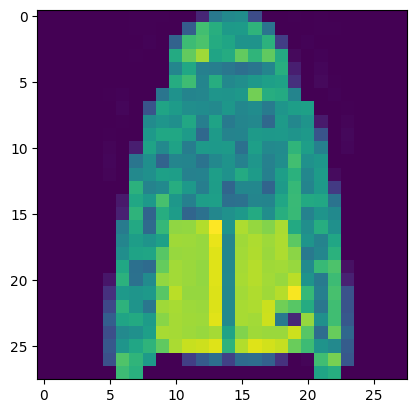

In [ ]:
# Select a random image index from the training data
image = random.randint(0, len(train_data))

# Display the randomly selected image from the training data using Matplotlib
plt.imshow(train_data[image], cmap='gray')  # Display the image in grayscale
plt.show()  # Show the plot

In [ ]:
# Normalize the training and testing data to the range [0, 1]
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)


### **2.Model Definition**

In [ ]:
# Split the training data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Define the model architecture using Keras Sequential API
model1 = tf.keras.Sequential([
    # Flatten the input image to a 1D vector (28x28 pixels to 784)
    Flatten(input_shape=(28, 28)),

    # First Dense layer with 256 units, ReLU activation, and L2 regularization
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Batch normalization to stabilize and accelerate training
    Dropout(0.4),  # Dropout layer to prevent overfitting by dropping 40% of neurons

    # Second Dense layer with 128 units, ReLU activation, and L2 regularization
    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Batch normalization
    Dropout(0.4),  # Dropout layer

    # Third Dense layer with 64 units, ReLU activation, and L2 regularization
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # Batch normalization
    Dropout(0.4),  # Dropout layer

    # Output Dense layer with 10 units (one for each class), softmax activation for multi-class classification
    Dense(10, activation="softmax")
])

# Print the model architecture summary
model1.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

### **3. Model Compilation and Training**

In [ ]:
# Compile the model
model1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Loss function for multi-class classification with integer labels
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    metrics=["accuracy"]  # Evaluation metric to track accuracy during training
)

# Callbacks to enhance training
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=8,  # Stop training if no improvement after 8 epochs
    restore_best_weights=True  # Restore the weights of the best epoch
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    patience=4,  # Reduce learning rate if no improvement after 4 epochs
    min_lr=1e-6  # Minimum learning rate
)

# Learning rate scheduler function
def lr_scheduler(epoch, lr):
    # Reduce learning rate exponentially after 10 epochs
    if epoch > 10:
        lr = lr * np.exp(-0.1)
    return lr

# Learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Fit the model with the specified callbacks
history = model1.fit(
    X_train, y_train,  # Training data and labels
    epochs=150,  # Number of epochs to train the model
    validation_data=(X_validation, y_validation),  # Validation data and labels for monitoring
    callbacks=[early_stopping, reduce_lr, lr_scheduler_callback]  # List of callbacks to use during training
)


Epoch 1/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6452 - loss: 1.5762 - val_accuracy: 0.8112 - val_loss: 0.8885 - learning_rate: 0.0010
Epoch 2/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7858 - loss: 0.9357 - val_accuracy: 0.8232 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 3/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8007 - loss: 0.7686 - val_accuracy: 0.8139 - val_loss: 0.6598 - learning_rate: 0.0010
Epoch 4/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7977 - loss: 0.7332 - val_accuracy: 0.8127 - val_loss: 0.6498 - learning_rate: 0.0010
Epoch 5/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8031 - loss: 0.6996 - val_accuracy: 0.8362 - val_loss: 0.5854 - learning_rate: 0.0010
Epoch 6/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8076 - loss: 0.6912 - val_accuracy: 0.8283 - val_loss: 0.5989 - learning_rate: 0.0010
Epoch 7/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accura

### **4. Evaluation**

In [ ]:
# Plot training & validation accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines', name='accuracy'))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines', name='val_accuracy'))
fig.update_layout(title='Training & Validation Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig.show()

# Plot training & validation loss
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='val_loss'))
fig.update_layout(title='Training & Validation Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()


In [ ]:
# Predict the class probabilities for the test data using the trained model
y_prob = model1.predict(test_data)

# Convert the class probabilities to class labels by taking the index of the maximum probability
y_pred = y_prob.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Define the class labels for the Fashion MNIST dataset
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


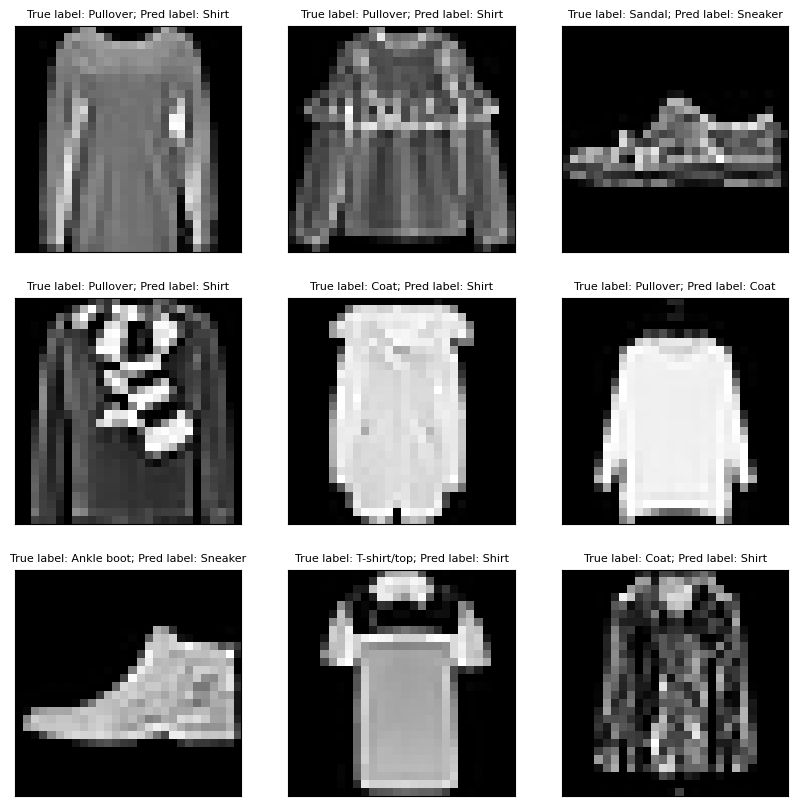

In [75]:
# Identify indices of misclassified samples
misclassified_idx = np.where(test_labels != y_pred)[0]

# Create a figure for plotting
plt.figure(figsize=(10, 10))

# Loop to plot 9 misclassified images
for i in range(9):
    # Randomly select an index from misclassified indices
    idx = np.random.choice(misclassified_idx)

    # Create a subplot for each image
    plt.subplot(3, 3, i + 1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines

    # Display the image
    plt.imshow(test_data[idx].reshape((28, 28)), cmap='gray')

    # Get the true and predicted labels
    true_label = classes[test_labels[idx]]
    pred_label = classes[y_pred[idx]]

    # Set the title of the subplot
    plt.title(f'True label: {true_label}; Pred label: {pred_label}', fontsize=8)

# Show the plot
plt.show()


In [ ]:
# Binarize the labels
y_test_bin = label_binarize(test_labels, classes=np.arange(10))

# Predict probabilities
y_score = model1.predict(test_data)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a Plotly figure for ROC curves
fig = make_subplots(rows=1, cols=1)

# Plot ROC curves for each class
for i in range(10):
    fig.add_trace(
        go.Scatter(
            x=fpr[i], y=tpr[i],
            mode='lines',
            name=f'Class {i} (AUC = {roc_auc[i]:.2f})'
        )
    )

# Add a diagonal reference line
fig.add_trace(
    go.Scatter(
        x=[0, 1], y=[0, 1],
        mode='lines',
        line=dict(dash='dash'),
        showlegend=False,
        name='Chance'
    )
)

# Update layout for the plot
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) for Multi-Class',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True,
    width=800,
    height=600
)

# Show the plot
fig.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


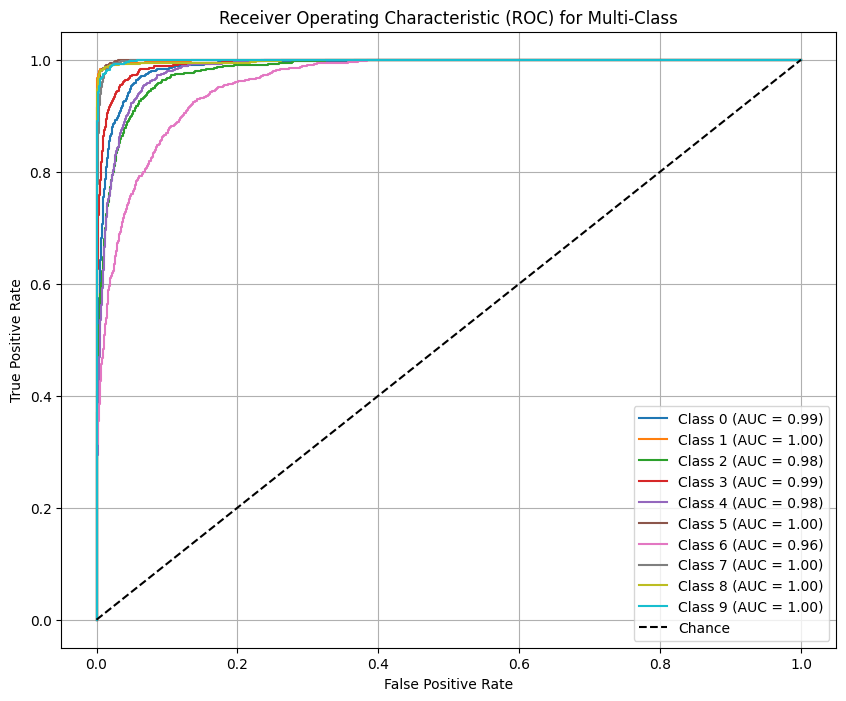

In [ ]:

# Binarize the labels
y_test_bin = label_binarize(test_labels, classes=np.arange(10))

# Predict probabilities
y_score = model1.predict(test_data)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot a diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
